In [1]:
# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    USING_COLAB = True
except:
    USING_COLAB = False

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# !pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 26.9 MB/s eta 0:00:00


In [4]:
import torch
import pandas as pd
from concurrent.futures import ThreadPoolExecutor
import nlpaug.augmenter.word as naw
import math

In [5]:
if USING_COLAB:
    path_dataset = "/content/drive/My Drive/GTSI/Codigos_proyectos_carrera/data"
    sufix = "colab"
else:
    path_dataset = "./data"
    sufix = "local"

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv(path_dataset + '/projects.csv')

In [8]:
df.shape

(19422, 7)

In [9]:
df.head()

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL,ESTADO
0,preparación de nano celulosa y su utilización ...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,Preparación de nano celulosa y su utilización ...,72.0,0,Activa
1,monitoreo no intrusivo de cargas eléctricas en...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,71.0,0,Activa
2,difusión del uso de herramientas tecnológicas ...,"Facultad de Arte, Diseño y Comunicación Audiov...",Diseño Gráfico,Difusión del uso de herramientas tecnológicas ...,62.0,0,Activa
3,variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,Variacion del tiempo de fraguado debido a mixt...,56.0,0,Activa
4,tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,Tecnologías aplicadas y análisis económico en ...,54.0,0,Activa


In [10]:
df["titulo"].nunique(), df["NOMBREPROYEC"].nunique(), df["FACULTAD"].nunique(), df["CARRERA"].nunique()

(18277, 18672, 10, 34)

In [11]:
df_titulo_count_all = df["titulo"].value_counts()
df_titulo_count = df_titulo_count_all[df_titulo_count_all > 1]
df_titulo_count

,count
titulo,
diseño de un equipo para la medición de la biodegradabilidad en películas polimérica y no poliméricas,6
diseño estudio caracterización y evaluación de la factibilidad de uso de un envase innovador para la industria alimentaria en el mercado ecuatoriano,6
diseño y desarrollo de una formula para el recubrimiento de una fruta de exportación no tradicional,5
desarrollo de la cadena de producción de alimentos basados en proteína de origen vegetal,5
prototipo de control automático de calidad de comida usando imágenes hiperespectrales,5
...,...
análisis de los riesgos y peligros de incendio en estaciones de transformación de energía y centro de control de motores,2
estudio de factibilidad para la comercialización en la ciudad de guayaquil de un dispositivo de control de consumo de energía en hogares,2
diseño de reservorios para riego en el recinto francisco de orellana parroquia la américa cantón jipijapa,2


In [12]:
df[df["titulo"] == df_titulo_count.keys()[0]]

,titulo,FACULTAD,CARRERA,NOMBREPROYEC,counts,URL,ESTADO
513,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Alimentos,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,24.0,0,Activa
541,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Mecánica,Diseño de un equipo para la medición de la bio...,24.0,0,Activa
1973,diseño de un equipo para la medición de la bio...,Facultad de Ciencias Naturales y Matemáticas,Ingeniería Química,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,16.0,0,Activa
2469,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Electricidad y Compu...,Electrónica y Automatización,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,15.0,0,Activa
4013,diseño de un equipo para la medición de la bio...,Facultad de Ciencias de la Vida,Biología,DISEÑO DE UN EQUIPO PARA LA MEDICIÓN DE LA BIO...,11.0,0,Activa
14458,diseño de un equipo para la medición de la bio...,Facultad de Ingeniería en Mecánica y Ciencias ...,Mecánica,Diseño de un equipo para la medición de la bio...,2.0,0,No Activa


In [13]:
df_carrera_count_all = df["CARRERA"].value_counts()
value_counts = 10
df_carrera_count = df_carrera_count_all[df_carrera_count_all >= value_counts]
df_carrera_count_less = df_carrera_count_all[df_carrera_count_all < value_counts]
df_carrera_count_all

,count
CARRERA,
Administración de Empresas,1898
Economía,1578
Computación,1421
Electricidad,1371
Auditoría y Control de Gestión,1083
Ingeniería Civil,1073
Ingeniería Industrial,1072
Telecomunicaciones,993
Electrónica y Automatización,739


In [14]:
df_carrera_count_all.shape, df_carrera_count.shape, df_carrera_count_less.shape

((34,), (33,), (1,))

In [15]:
df_carrera_count_less

,count
CARRERA,
Tecnología Superior en Logistica Portuaria,9


In [16]:
df_carrera_count

,count
CARRERA,
Administración de Empresas,1898
Economía,1578
Computación,1421
Electricidad,1371
Auditoría y Control de Gestión,1083
Ingeniería Civil,1073
Ingeniería Industrial,1072
Telecomunicaciones,993
Electrónica y Automatización,739


In [17]:
df_new = df[df["CARRERA"].isin(df_carrera_count.index)]
df_new.shape

(19413, 7)

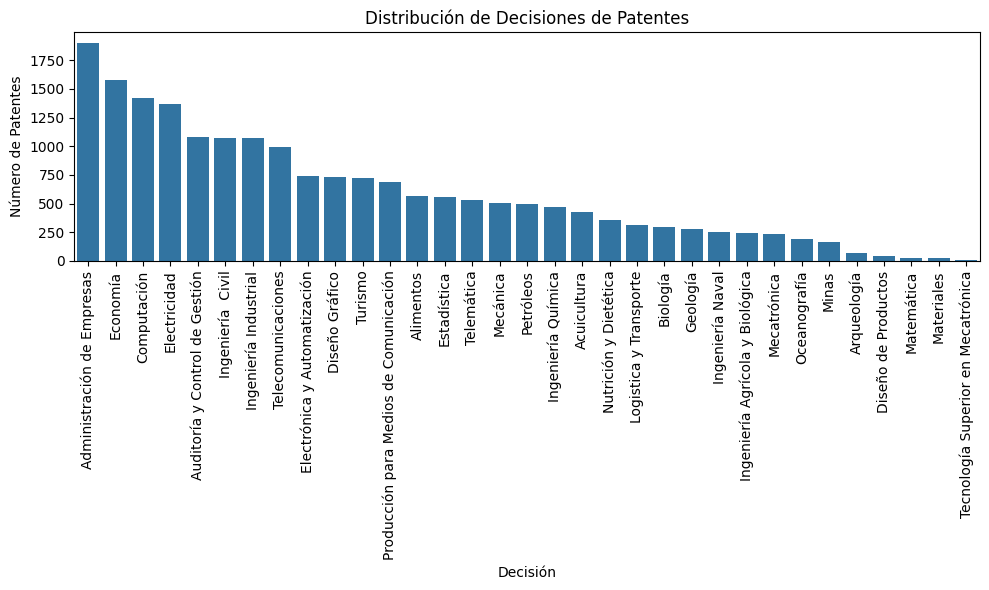

In [18]:
# diagrama de barras de la columna "decision"
plt.figure(figsize=(10, 6))
sns.countplot(data=df_new, x='CARRERA', order=df_new['CARRERA'].value_counts().index)
plt.title('Distribución de Decisiones de Patentes')
plt.xlabel('Decisión')
plt.ylabel('Número de Patentes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## DataAugmentation

In [ ]:
def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None, mode='balance'):
    """
    Balancea dataset usando múltiples GPUs con paralelización intra-clase
    
    Args:
        df: DataFrame a balancear
        text_col: Columna con el texto
        label_col: Columna con las etiquetas
        gpu_ids: Lista de IDs de GPU a usar
        target_count: Número objetivo de muestras por clase
        mode: 'balance' (igualar al máximo) o 'add' (añadir target_count a cada clase)
    """
    # Verificar GPUs disponibles
    available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
    print(f"GPUs disponibles: {available_gpus}")

    if available_gpus == 0:
        print("⚠️ No hay GPUs disponibles, usando CPU")
        gpu_ids = ['cpu']
    elif available_gpus < len(gpu_ids):
        print(f"⚠️ Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
        gpu_ids = gpu_ids[:available_gpus]

    # Crear augmenters para cada GPU
    augmenters = {}
    for gpu_id in gpu_ids:
        device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
        # Opción 1: Modelo específico para español (mejor rendimiento)
        augmenters[gpu_id] = naw.ContextualWordEmbsAug(
            model_path='dccuchile/bert-base-spanish-wwm-uncased',  # Modelo español
            aug_p=0.12,  # Ajustar para textos en español
            top_k=100,   # Más variedad en reemplazos
            device=device
        )
        print(f"✅ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

    # Análisis de clases
    class_counts = df[label_col].value_counts()
    
    # Determinar target_count según el modo
    if mode == 'balance':
        # Modo balance: igualar todas las clases al máximo actual
        if target_count is None:
            target_count = class_counts.max()
            print(f"🔍 Modo BALANCE: Igualando todas las clases al máximo actual: {target_count:,}")
        else:
            print(f"🔍 Modo BALANCE: Igualando todas las clases a: {target_count:,}")
    elif mode == 'add':
        # Modo add: añadir target_count a cada clase
        if target_count is None:
            target_count = 1000  # Valor por defecto
            print(f"🔍 Modo ADD: Añadiendo {target_count:,} muestras a cada clase")
        else:
            print(f"🔍 Modo ADD: Añadiendo {target_count:,} muestras a cada clase")

    print(f"\nDistribución actual:")
    for class_label, count in class_counts.items():
        print(f"  {class_label}: {count:,}")
    
    if mode == 'balance':
        print(f"\nObjetivo: {target_count:,} muestras por clase (BALANCE)")
    else:
        print(f"\nObjetivo: Añadir {target_count:,} muestras a cada clase (ADD)")

    def process_batch_on_gpu(args):
        """Procesa un lote de una clase en una GPU específica"""
        class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

        augmenter = augmenters[gpu_id]
        augmented_data = []

        batch_end = min(batch_start + batch_size, total_needed)
        actual_batch_size = batch_end - batch_start
        print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

        print(f"🚀 {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
              f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")

            
        # Procesar en mini-batches
        mini_batch_size = 16
        for i in range(0, actual_batch_size, mini_batch_size):
            mini_end = min(i + mini_batch_size, actual_batch_size)
            print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
            mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
            print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

            try:
                augmented_batch = augmenter.augment(mini_texts, 
                                                    n=math.ceil((batch_end - i) / len(class_texts)),
                                                    num_thread=1 if gpu_id == 'cpu' else 4)

                for j, aug_text in enumerate(augmented_batch):
                    # Mantener las columnas originales del dataframe
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: aug_text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })

            except Exception as e:
                print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
                # Fallback
                for j, text in enumerate(mini_texts):
                    original_idx = (i + j) % len(class_texts)
                    original_row = df[df[label_col] == class_label].iloc[original_idx]

                    global_idx = batch_start + i + j
                    augmented_data.append({
                        'FACULTAD': original_row['FACULTAD'],
                        'NOMBREPROYEC': original_row['NOMBREPROYEC'],
                        text_col: text,
                        label_col: class_label,
                        'gpu_used': gpu_id,
                        'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
                    })
            finally:
                print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

        print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
              f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
        return augmented_data

    # Preparar trabajos dividiendo cada clase entre GPUs
    all_jobs = []

    for class_label, current_count in class_counts.items():
        if mode == 'balance':
            # Modo balance: calcular cuántas faltan para llegar al target
            needed = target_count - current_count
        else:  # mode == 'add'
            # Modo add: añadir target_count a la cantidad actual
            needed = target_count
        
        if needed <= 0 and mode == 'balance':
            print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
            continue
        elif needed <= 0 and mode == 'add':
            print(f"⚠️ target_count debe ser > 0 para modo ADD. Saltando clase {class_label}")
            continue

        print(f"Clase {class_label}: Actual={current_count:,}, Añadir={needed:,}, Objetivo={target_count:,}")
        
        class_texts = df[df[label_col] == class_label][text_col].tolist()
        class_texts.reverse()

        num_batches = 8  # O el número de hilos que quieras
        batch_size = math.ceil(needed / num_batches)
        for i in range(num_batches):
            batch_start = i * batch_size
            if batch_start >= needed:
                break
            this_batch_size = min(batch_size, needed - batch_start)
            print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
                  f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tamaño de class_texts los {label_col} = {len(class_texts)}")
            all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


    if not all_jobs:
        if mode == 'balance':
            print("✅ El dataset ya está balanceado")
        else:
            print("✅ No hay trabajos que procesar")
        return df

    print(f"\n🔥 Total de trabajos paralelos: {len(all_jobs)}")

    # Ejecutar todos los trabajos en paralelo
    all_augmented_data = []
    max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
    # max_workers = len(all_jobs)
    print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        results = executor.map(process_batch_on_gpu, all_jobs)

        for result in results:
            all_augmented_data.extend(result)

    # Combinar resultados
    if all_augmented_data:
        augmented_df = pd.DataFrame(all_augmented_data)
        balanced_df = pd.concat([df, augmented_df], ignore_index=True)
    else:
        balanced_df = df.copy()

    print(f"\n🎉 Completado!")
    print(f"Total original: {len(df):,}")
    print(f"Total final: {len(balanced_df):,}")
    print(f"Muestras añadidas: {len(all_augmented_data):,}")

    # Mostrar distribución final
    final_counts = balanced_df[label_col].value_counts()
    print(f"\nDistribución final:")
    for class_label, count in final_counts.items():
        original_count = class_counts[class_label]
        added = count - original_count
        print(f"  {class_label}: {count:,} (original: {original_count:,}, añadido: {added:,})")

    # Mostrar uso detallado por GPU
    if len(all_augmented_data) > 0:
        augmented_df_temp = pd.DataFrame(all_augmented_data)

        print("\n📊 Uso detallado por GPU:")
        gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

        for gpu_id in gpu_ids:
            gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
            total_gpu = gpu_data['count'].sum()
            print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

            for _, row in gpu_data.iterrows():
                print(f"    - {row[label_col]}: {row['count']:,}")

    return balanced_df

In [ ]:
# def balance_with_multi_gpu_parallel(df, text_col='titulo', label_col='CARRERA', gpu_ids=[0, 1], target_count=None):
#     """Balancea dataset usando múltiples GPUs con paralelización intra-clase"""
#     # Verificar GPUs disponibles
#     available_gpus = torch.cuda.device_count() if torch.cuda.is_available() else 0
#     print(f"GPUs disponibles: {available_gpus}")

#     if available_gpus == 0:
#         print("⚠️ No hay GPUs disponibles, usando CPU")
#         gpu_ids = ['cpu']
#     elif available_gpus < len(gpu_ids):
#         print(f"⚠️ Solo {available_gpus} GPUs disponibles, usando las primeras {available_gpus}")
#         gpu_ids = gpu_ids[:available_gpus]

#     # Crear augmenters para cada GPU
#     augmenters = {}
#     for gpu_id in gpu_ids:
#         device = f'cuda:{gpu_id}' if gpu_id != 'cpu' else 'cpu'
#         augmenters[gpu_id] = naw.ContextualWordEmbsAug(
#             model_path='bert-base-multilingual-uncased',
#             aug_p=0.12,  # Ajustar para textos en español
#             top_k=100,   # Más variedad en reemplazos
#             device=device
#         )
#         print(f"✅ Augmenter creado en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}")

#     # Análisis de clases
#     class_counts = df[label_col].value_counts()
#     # --------------------------------------------------
#     if target_count is None:
#         target_count = class_counts.max()
#         print(f"🔍 No se especificó target_count, ahora se usarà el máximo de clases: {target_count:,}")
#     # --------------------------------------------------


#     print(f"\nDistribución actual:")
#     for class_label, count in class_counts.items():
#         print(f"  {class_label}: {count:,}")
#     print(f"\nObjetivo: {target_count:,} muestras por clase")

#     def process_batch_on_gpu(args):
#         """Procesa un lote de una clase en una GPU específica"""
#         class_label, batch_start, batch_size, class_texts, gpu_id, total_needed = args

#         augmenter = augmenters[gpu_id]
#         augmented_data = []

#         batch_end = min(batch_start + batch_size, total_needed)
#         actual_batch_size = batch_end - batch_start
#         print("actual_batch_size", actual_batch_size, "batch_end", batch_end, "batch_start", batch_start)

#         print(f"🚀 {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Procesando clase {class_label} "
#               f"[{batch_start:,}-{batch_end:,}] ({actual_batch_size:,} muestras)")


#         # Procesar en mini-batches
#         mini_batch_size = 16
#         for i in range(0, actual_batch_size, mini_batch_size):
#             mini_end = min(i + mini_batch_size, actual_batch_size)
#             print("desde", i, "hasta", mini_end, "mini_batch_size", mini_batch_size, "actual_batch_size", actual_batch_size)
#             mini_texts = [class_texts[j % len(class_texts)] for j in range(i, mini_end)]
#             print(f"  Procesando mini-batch {i // mini_batch_size + 1}, i {i}, mini_end {mini_end}, mini_texts {len(mini_texts)}")

#             try:
#                 augmented_batch = augmenter.augment(mini_texts,
#                                                     n=math.ceil((batch_end - i) / len(class_texts)),
#                                                     num_thread=1 if gpu_id == 'cpu' else 4)

#                 for j, aug_text in enumerate(augmented_batch):
#                     # Mantener las columnas originales del dataframe
#                     original_idx = (i + j) % len(class_texts)
#                     original_row = df[df[label_col] == class_label].iloc[original_idx]

#                     global_idx = batch_start + i + j
#                     augmented_data.append({
#                         'FACULTAD': original_row['FACULTAD'],
#                         'NOMBREPROYEC': original_row['NOMBREPROYEC'],
#                         text_col: aug_text,
#                         label_col: class_label,
#                         'gpu_used': gpu_id,
#                         'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
#                     })

#             except Exception as e:
#                 print(f"Error en {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {e}")
#                 # Fallback
#                 for j, text in enumerate(mini_texts):
#                     original_idx = (i + j) % len(class_texts)
#                     original_row = df[df[label_col] == class_label].iloc[original_idx]

#                     global_idx = batch_start + i + j
#                     augmented_data.append({
#                         'FACULTAD': original_row['FACULTAD'],
#                         'NOMBREPROYEC': original_row['NOMBREPROYEC'],
#                         text_col: text,
#                         label_col: class_label,
#                         'gpu_used': gpu_id,
#                         'batch_id': f"{class_label}_GPU{gpu_id}_{batch_start}-{batch_end}"
#                     })
#             finally:
#                 print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} batch {i // batch_size + 1} ({len(augmented_data):,} muestras), i {i})")

#         print(f"✅ {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: Completado lote {class_label} "
#               f"[{batch_start:,}-{batch_end:,}] - {len(augmented_data)} muestras generadas")
#         return augmented_data

#     # Preparar trabajos dividiendo cada clase entre GPUs
#     all_jobs = []

#     for class_label, current_count in class_counts.items():
#         needed = target_count - current_count

#         if needed <= 0:
#             print(f"Clase {class_label} ya tiene suficientes muestras ({current_count:,})")
#             continue

#         print("needed", needed, "needed menos", 5000, "target_count", target_count, "current_count", current_count)
#         # needed = 5000

#         class_texts = df[df[label_col] == class_label][text_col].tolist()
#         class_texts.reverse()

#         num_batches = 8  # O el número de hilos que quieras
#         batch_size = math.ceil(needed / num_batches)
#         for i in range(num_batches):
#             batch_start = i * batch_size
#             if batch_start >= needed:
#                 break
#             this_batch_size = min(batch_size, needed - batch_start)
#             print(f"Clase {class_label}: Lote {i + 1}/{num_batches} - "
#                   f"Desde {batch_start} hasta {batch_start + this_batch_size} ({this_batch_size} muestras) - tamaño de class_texts los {label_col} = {len(class_texts)}")
#             all_jobs.append((class_label, batch_start, this_batch_size, class_texts, gpu_ids[0], needed))


#     if not all_jobs:
#         print("✅ El dataset ya está balanceado")
#         return df

#     print(f"\n🔥 Total de trabajos paralelos: {len(all_jobs)}")

#     # Ejecutar todos los trabajos en paralelo
#     all_augmented_data = []
#     max_workers = min(len(all_jobs), len(gpu_ids) * 2)  # Limitar workers
#     # max_workers = len(all_jobs)
#     print("max_workers", max_workers, len(all_jobs), len(gpu_ids))

#     with ThreadPoolExecutor(max_workers=max_workers) as executor:
#         results = executor.map(process_batch_on_gpu, all_jobs)

#         for result in results:
#             all_augmented_data.extend(result)

#     # Combinar resultados
#     if all_augmented_data:
#         augmented_df = pd.DataFrame(all_augmented_data)
#         balanced_df = pd.concat([df, augmented_df], ignore_index=True)
#     else:
#         balanced_df = df.copy()

#     print(f"\n🎉 Completado!")
#     print(f"Total original: {len(df):,}")
#     print(f"Total final: {len(balanced_df):,}")
#     print(f"Muestras añadidas: {len(all_augmented_data):,}")

#     # Mostrar distribución final
#     final_counts = balanced_df[label_col].value_counts()
#     print(f"\nDistribución final:")
#     for class_label, count in final_counts.items():
#         print(f"  {class_label}: {count:,}")

#     # Mostrar uso detallado por GPU
#     if len(all_augmented_data) > 0:
#         augmented_df_temp = pd.DataFrame(all_augmented_data)

#         print("\n📊 Uso detallado por GPU:")
#         gpu_usage = augmented_df_temp.groupby(['gpu_used', label_col]).size().reset_index(name='count')

#         for gpu_id in gpu_ids:
#             gpu_data = gpu_usage[gpu_usage['gpu_used'] == gpu_id]
#             total_gpu = gpu_data['count'].sum()
#             print(f"\n  {'GPU' if gpu_id != 'cpu' else 'CPU'} {gpu_id}: {total_gpu:,} muestras totales")

#             for _, row in gpu_data.iterrows():
#                 print(f"    - {row[label_col]}: {row['count']:,}")

#     return balanced_df

In [20]:
balanced_df = balance_with_multi_gpu_parallel(df, gpu_ids=[0], target_count=5000) # 39 min

GPUs disponibles: 1


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

✅ Augmenter creado en GPU 0

Distribución actual:
  Administración de Empresas: 1,898
  Economía: 1,578
  Computación: 1,421
  Electricidad: 1,371
  Auditoría y Control de Gestión: 1,083
  Ingeniería  Civil: 1,073
  Ingeniería Industrial: 1,072
  Telecomunicaciones: 993
  Electrónica y Automatización: 739
  Diseño Gráfico: 729
  Turismo: 721
  Producción para Medios de Comunicación: 687
  Alimentos: 563
  Estadística: 561
  Telemática: 528
  Mecánica: 506
  Petróleos: 497
  Ingeniería Química: 468
  Acuicultura: 422
  Nutrición y Dietética: 360
  Logistica y Transporte: 310
  Biología: 297
  Geología: 279
  Ingeniería Naval: 255
  Ingeniería Agrícola y Biológica: 247
  Mecatrónica: 233
  Oceanografía: 193
  Minas: 161
  Arqueología: 69
  Diseño de Productos: 38
  Materiales: 25
  Matemática: 25
  Tecnología Superior en Mecatrónica: 11
  Tecnología Superior en Logistica Portuaria: 9

Objetivo: 5,000 muestras por clase
needed 3102 needed menos 5000 target_count 5000 current_count 1898
Cl

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
✅ GPU 0: Completado lote Arqueología batch 1 (304 muestras), i 288)
desde 304 hasta 320 mini_batch_size 16 actual_batch_size 612
  Procesando mini-batch 20, i 304, mini_end 320, mini_texts 16
✅ GPU 0: Completado lote Arqueología batch 1 (320 muestras), i 304)
desde 320 hasta 336 mini_batch_size 16 actual_batch_size 617
  Procesando mini-batch 21, i 320, mini_end 336, mini_texts 16
✅ GPU 0: Completado lote Arqueología batch 1 (320 muestras), i 304)
desde 320 hasta 336 mini_batch_size 16 actual_batch_size 612
  Procesando mini-batch 21, i 320, mini_end 336, mini_texts 16
✅ GPU 0: Completado lote Arqueología batch 1 (336 muestras), i 320)
desde 336 hasta 352 mini_batch_size 16 actual_batch_size 617
  Procesando mini-batch 22, i 336, mini_end 352, mini_texts 16
✅ GPU 0: Completado lote Arqueología batch 1 (336 muestras), i 320)
desde 336 hasta 352 mini_batch_size 16 actual_batch_size 612
  Procesando mini-batch 22, i 336, m

In [21]:
balanced_df.to_csv(path_dataset + "/projects_augmented_" + sufix + ".csv", index=False)